<a href="https://colab.research.google.com/github/Taran-Gupta/DS4002_Project1/blob/main/DS4001_Samantha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import string
from collections import Counter
import re

In [2]:
# Load the dataset
data = pd.read_csv("../Data/spam.csv", encoding='ISO-8859-1')
data.drop(data[data['v1'] == 'ham'].index, inplace=True)

data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN


In [3]:
# analysis of SPAM messages
data = pd.read_csv("../Data/spam.csv", encoding='ISO-8859-1')
data.drop(data[data['v1'] == 'ham'].index, inplace=True)

total = len(data)

text = ' '.join(data['v2'])

# Use regular expressions to find all special characters in the text
special_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
num_special = len(special_chars)

special_counts = Counter(special_chars)
average_per_message = num_special / total
top_special = special_counts.most_common(8)

# Filter out the top special characters to exclude '.', ',', and ' '
stop_special_chars = ['.', ',', ' ']
filtered_top_special = []
for char, count in top_special:
    if char not in stop_special_chars:
        filtered_top_special.append((char, count))

text_clean = text.lower()
text_clean = text_clean.translate(str.maketrans('', '', string.punctuation))
words = text_clean.split()

# Define a list of common stop words to exclude from the word count
stop_words = [
    "a", "and", "in", "an", "that", "the", "is", "it", "how", "are",
    "you", "doing", "i", "am", "at", "pm", "we", "can", "for", "some",
    "then", "bye", "see", "to", "of"
]

filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)
top_words = word_counts.most_common(5)

# Print the results
print(f"Total special characters found: {num_special}")
print("Average Special Characters per message:")
print(average_per_message)
print("Top special characters (excluding '.', ',', and ' '):")
for char, count in filtered_top_special:
    print(f"  '{char}' : {count} times")

print("\nThe 5 most common words (after removing stop words):")
for word, count in top_words:
    print(f"* '{word}': {count} occurrences")

Total special characters found: 4936
Average Special Characters per message:
6.607764390896921
Top special characters (excluding '.', ',', and ' '):
  '!' : 542 times
  '/' : 372 times
  'å' : 328 times
  '£' : 324 times
  '-' : 247 times
  ':' : 179 times

The 5 most common words (after removing stop words):
* 'call': 347 occurrences
* 'your': 263 occurrences
* 'free': 216 occurrences
* 'now': 189 occurrences
* 'or': 188 occurrences


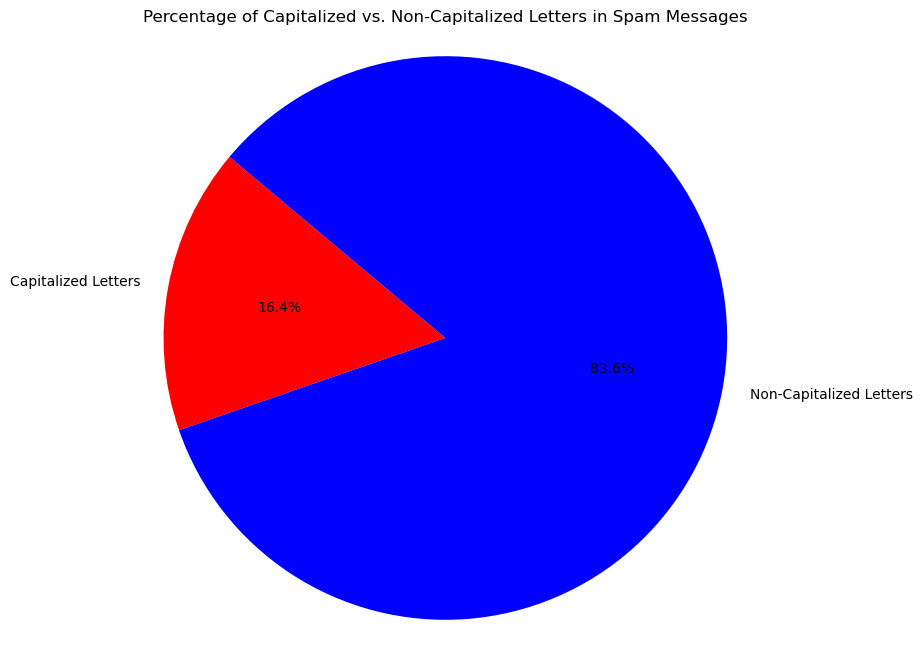

Total capital letters: 11535
Total letters: 70263
Percentage of capitalized letters: 16.42%


In [4]:
# Analysis of SPAM messages
data = pd.read_csv("../Data/spam.csv", encoding='ISO-8859-1')
data.drop(data[data['v1'] == 'ham'].index, inplace=True)

# Count total capital letters and total letters in the dataset
total_capital_letters = 0
total_letters = 0

for message in data['v2']:
    if isinstance(message, str):
        for char in message:
            if char.isalpha():
                total_letters += 1
                if char.isupper():
                    total_capital_letters += 1

if total_letters > 0:
    percentage_capitalized = (total_capital_letters / total_letters) * 100
    percentage_non_capitalized = 100 - percentage_capitalized

    # Visualize the percentage of capitalized vs. non-capitalized letters using a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie([percentage_capitalized, percentage_non_capitalized], labels=['Capitalized Letters', 'Non-Capitalized Letters'], colors=['red', 'blue'], autopct='%1.1f%%',startangle=140)
    plt.axis('equal')
    plt.title('Percentage of Capitalized vs. Non-Capitalized Letters in Spam Messages')
    plt.show()

    print(f"Total capital letters: {total_capital_letters}")
    print(f"Total letters: {total_letters}")
    print(f"Percentage of capitalized letters: {percentage_capitalized:.2f}%")
else:
    print("No letters found in the dataset.")

C:\Users\taran\AppData\Local\Temp\ipykernel_14728\366009619.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Character', y='Count', data=special_chars_df, ax=axes[0], palette='viridis')
C:\Users\taran\AppData\Local\Temp\ipykernel_14728\366009619.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=words_df, ax=axes[1], palette='magma')


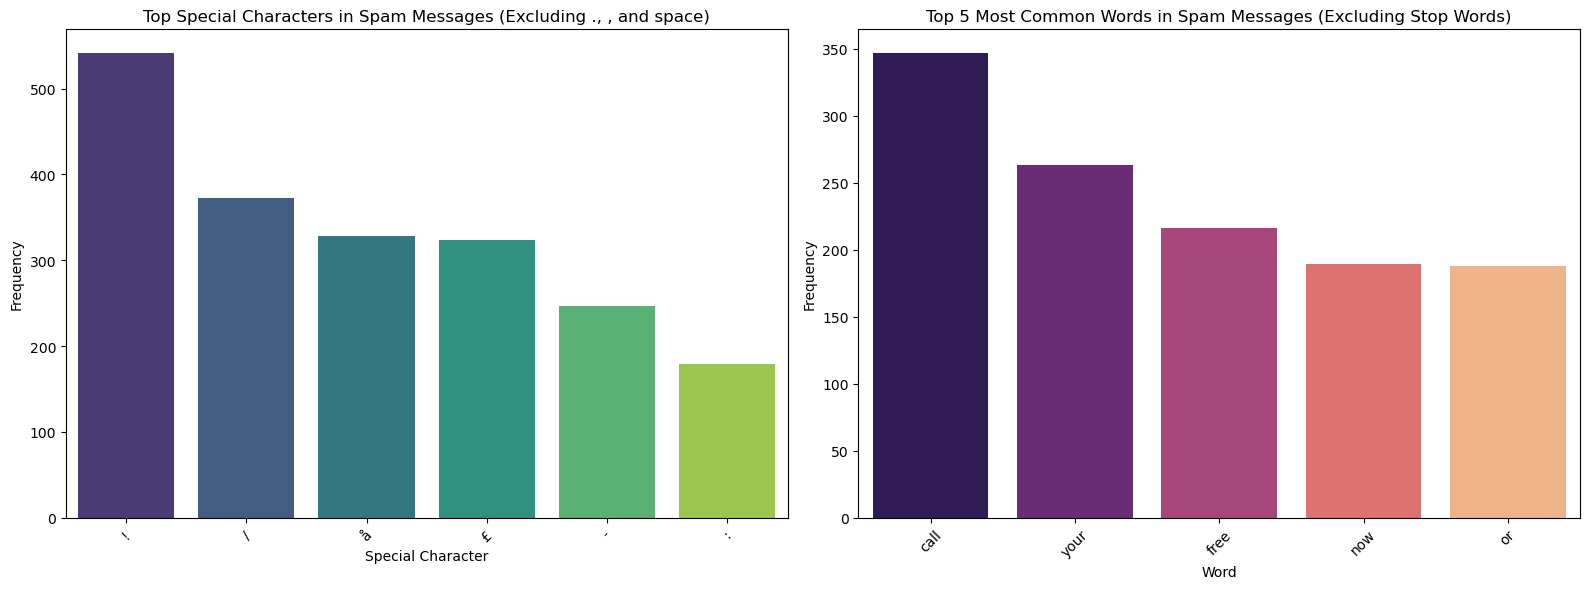

In [5]:
# Prepare data for top special characters (using the filtered list)
special_chars_df = pd.DataFrame(filtered_top_special, columns=['Character', 'Count'])

# Prepare data for top words
words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])

# Create subplots for special characters and words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for Top Special Characters
sns.barplot(x='Character', y='Count', data=special_chars_df, ax=axes[0], palette='viridis')
axes[0].set_title('Top Special Characters in Spam Messages (Excluding ., , and space)')
axes[0].set_xlabel('Special Character')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Top Words
sns.barplot(x='Word', y='Count', data=words_df, ax=axes[1], palette='magma')
axes[1].set_title('Top 5 Most Common Words in Spam Messages (Excluding Stop Words)')
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [6]:
# analysis of HAM messages
data = pd.read_csv("../Data/spam.csv", encoding='ISO-8859-1')
data.drop(data[data['v1'] == 'spam'].index, inplace=True)

total = len(data)

text = ' '.join(data['v2'])

special_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
num_special = len(special_chars)

special_counts = Counter(special_chars)
average_per_message = num_special / total
top_special = special_counts.most_common(7)

stop_special_chars = ['.', ',', ' ']
filtered_top_special = []
for char, count in top_special:
    if char not in stop_special_chars:
        filtered_top_special.append((char, count))

text_clean = text.lower()
text_clean = text_clean.translate(str.maketrans('', '', string.punctuation))
words = text_clean.split()

stop_words = [
    "a", "and", "in", "an", "that", "the", "is", "it", "how", "are",
    "you", "doing", "i", "am", "at", "pm", "we", "can", "for", "some",
    "then", "bye", "see", "to", "of"
]

filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)
top_words = word_counts.most_common(5)

print(f"Total special characters found: {num_special}")
print("Average Special Characters per message:")
print(average_per_message)
print("Top special characters:")
for char, count in top_special:
    if char == ' ':
        continue  # skip space just in case
    print(f"  '{char}' : {count} times")

print("\nThe 5 most common words (after removing stop words):")
for word, count in top_words:
    print(f"* '{word}': {count} occurrences")

Total special characters found: 19704
Average Special Characters per message:
4.0837305699481865
Top special characters:
  '.' : 9488 times
  ''' : 1744 times
  ',' : 1508 times
  '?' : 1367 times
  '!' : 839 times
  ';' : 762 times
  '&' : 738 times

The 5 most common words (after removing stop words):
* 'u': 972 occurrences
* 'me': 756 occurrences
* 'my': 743 occurrences
* 'im': 449 occurrences
* 'have': 438 occurrences


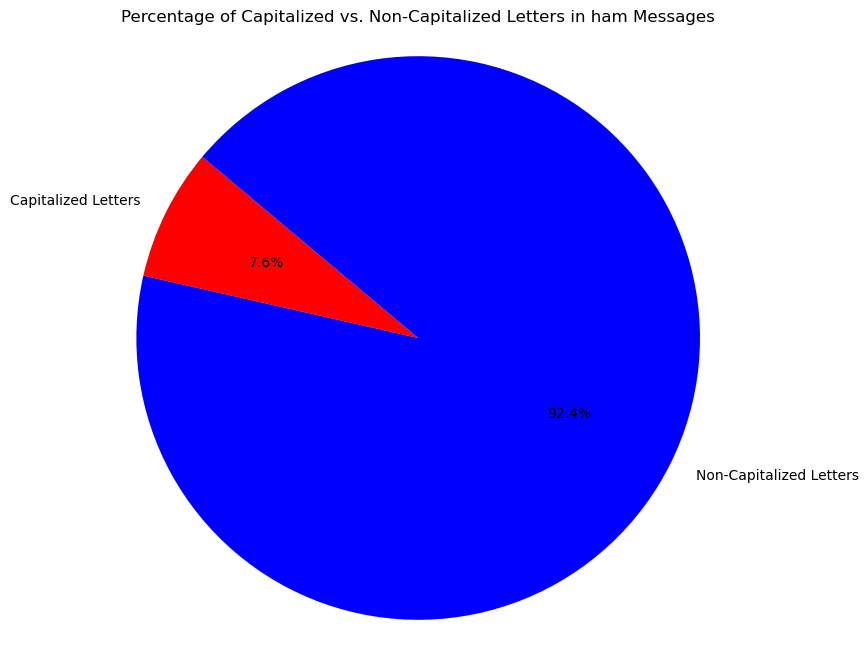

Total capital letters: 19469
Total letters: 257663
Percentage of capitalized letters: 7.56%


In [7]:
# analysis of HAM messages
data = pd.read_csv("../Data/spam.csv", encoding='ISO-8859-1')
data.drop(data[data['v1'] == 'spam'].index, inplace=True)

# Count total capital letters and total letters in the dataset
total_capital_letters = 0
total_letters = 0

for message in data['v2']:
    if isinstance(message, str):
        for char in message:
            if char.isalpha():
                total_letters += 1
                if char.isupper():
                    total_capital_letters += 1

if total_letters > 0:
    percentage_capitalized = (total_capital_letters / total_letters) * 100
    percentage_non_capitalized = 100 - percentage_capitalized

    # Visualize the percentage of capitalized vs. non-capitalized letters using a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie([percentage_capitalized, percentage_non_capitalized], labels=['Capitalized Letters', 'Non-Capitalized Letters'], colors=['red', 'blue'], autopct='%1.1f%%',startangle=140)
    plt.axis('equal')
    plt.title('Percentage of Capitalized vs. Non-Capitalized Letters in ham Messages')
    plt.show()

    print(f"Total capital letters: {total_capital_letters}")
    print(f"Total letters: {total_letters}")
    print(f"Percentage of capitalized letters: {percentage_capitalized:.2f}%")
else:
    print("No letters found in the dataset.")
